🔍 KNN Classification Accuracy: 1.0


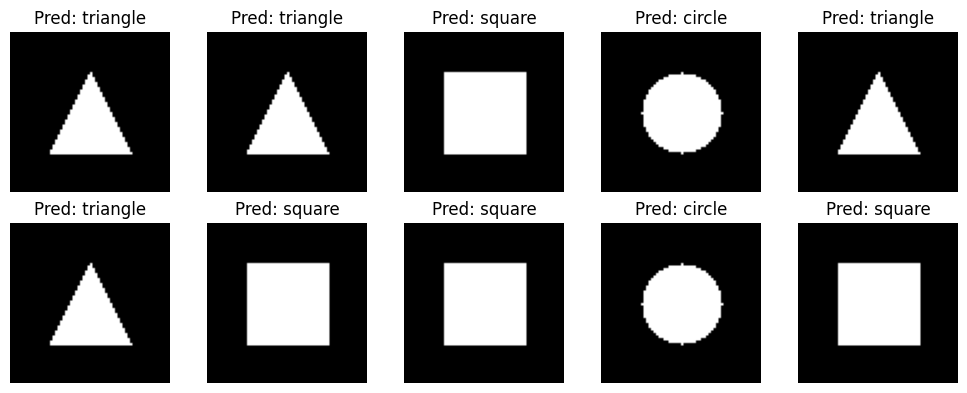

In [5]:
#KNN for classifying grayscale img of shapes
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Function to create grayscale shape image
def create_shape_image(shape, size=64):
    img = np.zeros((size, size), dtype=np.uint8)
    if shape == 'circle':
        cv2.circle(img, (size//2, size//2), size//4, 255, -1)
    elif shape == 'square':
        cv2.rectangle(img, (size//4, size//4), (3*size//4, 3*size//4), 255, -1)
    elif shape == 'triangle':
        pts = np.array([[size//2, size//4], [size//4, 3*size//4], [3*size//4, 3*size//4]], np.int32)
        cv2.drawContours(img, [pts], 0, 255, -1)
    return img

# Create dataset
shapes = ['circle', 'square', 'triangle']
X, y = [], []
for label, shape in enumerate(shapes):
    for _ in range(100):  # 100 samples per shape
        img = create_shape_image(shape)
        X.append(img.flatten())
        y.append(label)

X = np.array(X)
y = np.array(y)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Evaluate
print("🔍 KNN Classification Accuracy:", accuracy_score(y_test, y_pred))

# Visualize a few test samples with predicted labels
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    img = X_test[i].reshape(64, 64)
    ax.imshow(img, cmap='gray')
    ax.set_title(f"Pred: {shapes[y_pred[i]]}")
    ax.axis('off')
plt.tight_layout()
plt.show()
